In [227]:
import pandas as pd
import numpy as np
import seaborn as sns
import math

In [228]:
bank_data = pd.read_csv("bank-full-cleaned.csv")
bank_data.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


In [229]:
len(bank_data.index)

45211

<AxesSubplot:xlabel='y', ylabel='count'>

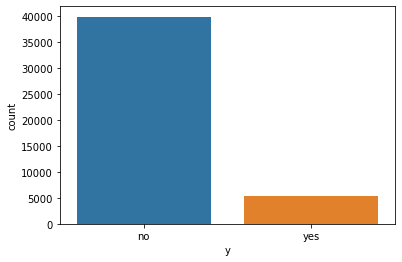

In [230]:
sns.countplot(x="y", data=bank_data)

<AxesSubplot:xlabel='y', ylabel='count'>

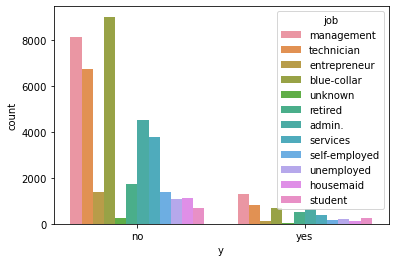

In [231]:
sns.countplot(x="y",hue = "job", data=bank_data)

<AxesSubplot:xlabel='y', ylabel='count'>

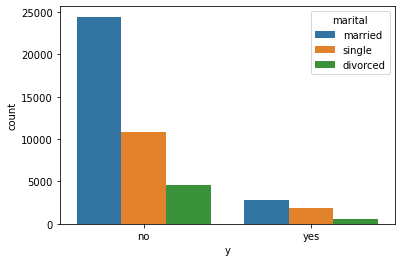

In [232]:
sns.countplot(x="y",hue = "marital", data=bank_data)

<AxesSubplot:xlabel='y', ylabel='count'>

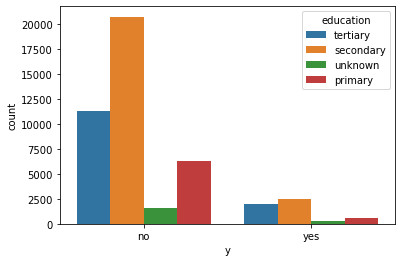

In [233]:
sns.countplot(x="y",hue = "education", data=bank_data)

<AxesSubplot:xlabel='y', ylabel='count'>

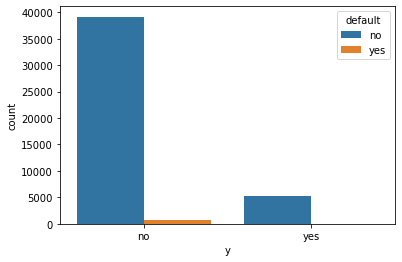

In [234]:
sns.countplot(x="y",hue = "default", data=bank_data)

<AxesSubplot:xlabel='y', ylabel='count'>

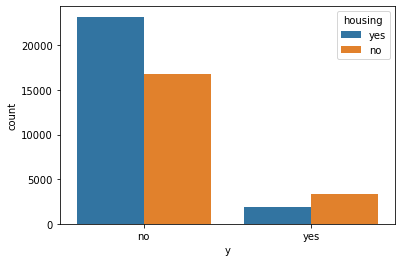

In [235]:
sns.countplot(x="y",hue = "housing", data=bank_data)

<AxesSubplot:xlabel='y', ylabel='count'>

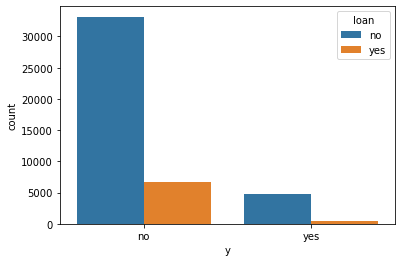

In [236]:
sns.countplot(x="y",hue = "loan", data=bank_data)

<AxesSubplot:xlabel='y', ylabel='count'>

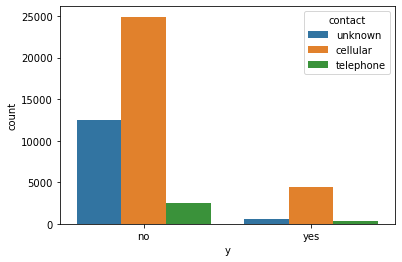

In [237]:
sns.countplot(x="y",hue = "contact", data=bank_data)

<AxesSubplot:xlabel='y', ylabel='count'>

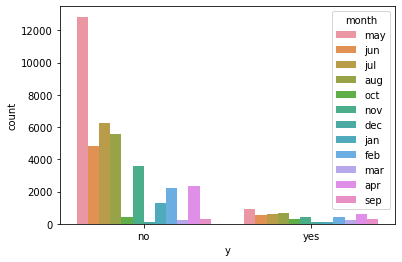

In [238]:
sns.countplot(x="y",hue = "month", data=bank_data)

<AxesSubplot:xlabel='y', ylabel='count'>

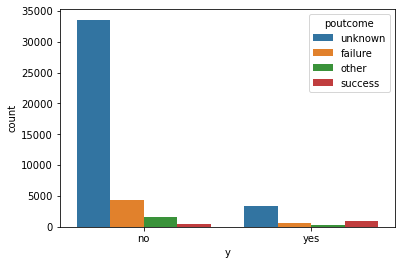

In [239]:
sns.countplot(x="y",hue = "poutcome", data=bank_data)

In [240]:
bank_data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [241]:
pd.get_dummies(bank_data['job'])

,admin.,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,unknown
0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,0,0
2,0,0,1,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
45206,0,0,0,0,0,0,0,0,0,1,0,0
45207,0,0,0,0,0,1,0,0,0,0,0,0
45208,0,0,0,0,0,1,0,0,0,0,0,0
45209,0,1,0,0,0,0,0,0,0,0,0,0


In [242]:
emp = pd.get_dummies(bank_data['job'], drop_first = True)
emp.head(10)

,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,unknown
0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,0,0
2,0,1,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,1
5,0,0,0,1,0,0,0,0,0,0,0
6,0,0,0,1,0,0,0,0,0,0,0
7,0,1,0,0,0,0,0,0,0,0,0
8,0,0,0,0,1,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,1,0,0


In [243]:
bank_data = pd.concat([bank_data,emp],axis=1)
print(bank_data.columns.tolist())

['age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'y', 'blue-collar', 'entrepreneur', 'housemaid', 'management', 'retired', 'self-employed', 'services', 'student', 'technician', 'unemployed', 'unknown']


In [244]:
bank_data.rename(columns={'unknown': 'empunknown'}, inplace=True)
print(bank_data.columns.tolist())

['age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'y', 'blue-collar', 'entrepreneur', 'housemaid', 'management', 'retired', 'self-employed', 'services', 'student', 'technician', 'unemployed', 'empunknown']


In [245]:
marital = pd.get_dummies(bank_data['marital'], drop_first = True)
bank_data = pd.concat([bank_data,marital],axis=1)
print(bank_data.columns.tolist())

['age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'y', 'blue-collar', 'entrepreneur', 'housemaid', 'management', 'retired', 'self-employed', 'services', 'student', 'technician', 'unemployed', 'empunknown', 'married', 'single']


In [246]:
education = pd.get_dummies(bank_data['education'], drop_first = True)
bank_data = pd.concat([bank_data,education],axis=1)
print(bank_data.columns.tolist())

['age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'y', 'blue-collar', 'entrepreneur', 'housemaid', 'management', 'retired', 'self-employed', 'services', 'student', 'technician', 'unemployed', 'empunknown', 'married', 'single', 'secondary', 'tertiary', 'unknown']


In [247]:
bank_data.rename(columns={'unknown': 'eduunknown'}, inplace=True)
print(bank_data.columns.tolist())

['age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'y', 'blue-collar', 'entrepreneur', 'housemaid', 'management', 'retired', 'self-employed', 'services', 'student', 'technician', 'unemployed', 'empunknown', 'married', 'single', 'secondary', 'tertiary', 'eduunknown']


In [248]:
default = pd.get_dummies(bank_data['default'], drop_first = True)
bank_data = pd.concat([bank_data,default],axis=1)
print(bank_data.columns.tolist())

['age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'y', 'blue-collar', 'entrepreneur', 'housemaid', 'management', 'retired', 'self-employed', 'services', 'student', 'technician', 'unemployed', 'empunknown', 'married', 'single', 'secondary', 'tertiary', 'eduunknown', 'yes']


In [249]:
bank_data.rename(columns={'yes': 'newdefault'}, inplace=True)
print(bank_data.columns.tolist())

['age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'y', 'blue-collar', 'entrepreneur', 'housemaid', 'management', 'retired', 'self-employed', 'services', 'student', 'technician', 'unemployed', 'empunknown', 'married', 'single', 'secondary', 'tertiary', 'eduunknown', 'newdefault']


In [250]:
hloan = pd.get_dummies(bank_data['housing'], drop_first = True)
bank_data = pd.concat([bank_data,hloan],axis=1)
print(bank_data.columns.tolist())

['age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'y', 'blue-collar', 'entrepreneur', 'housemaid', 'management', 'retired', 'self-employed', 'services', 'student', 'technician', 'unemployed', 'empunknown', 'married', 'single', 'secondary', 'tertiary', 'eduunknown', 'newdefault', 'yes']


In [251]:
bank_data.rename(columns={'yes': 'houseloan'}, inplace=True)
print(bank_data.columns.tolist())

['age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'y', 'blue-collar', 'entrepreneur', 'housemaid', 'management', 'retired', 'self-employed', 'services', 'student', 'technician', 'unemployed', 'empunknown', 'married', 'single', 'secondary', 'tertiary', 'eduunknown', 'newdefault', 'houseloan']


In [252]:
loan = pd.get_dummies(bank_data['loan'], drop_first = True)
bank_data = pd.concat([bank_data,loan],axis=1)
print(bank_data.columns.tolist())

['age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'y', 'blue-collar', 'entrepreneur', 'housemaid', 'management', 'retired', 'self-employed', 'services', 'student', 'technician', 'unemployed', 'empunknown', 'married', 'single', 'secondary', 'tertiary', 'eduunknown', 'newdefault', 'houseloan', 'yes']


In [253]:
bank_data.rename(columns={'yes': 'personalLoan'}, inplace=True)
print(bank_data.columns.tolist())

['age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'y', 'blue-collar', 'entrepreneur', 'housemaid', 'management', 'retired', 'self-employed', 'services', 'student', 'technician', 'unemployed', 'empunknown', 'married', 'single', 'secondary', 'tertiary', 'eduunknown', 'newdefault', 'houseloan', 'personalLoan']


In [254]:
comm = pd.get_dummies(bank_data['contact'], drop_first = True)
bank_data = pd.concat([bank_data,comm],axis=1)
print(bank_data.columns.tolist())

['age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'y', 'blue-collar', 'entrepreneur', 'housemaid', 'management', 'retired', 'self-employed', 'services', 'student', 'technician', 'unemployed', 'empunknown', 'married', 'single', 'secondary', 'tertiary', 'eduunknown', 'newdefault', 'houseloan', 'personalLoan', 'telephone', 'unknown']


In [255]:
bank_data.rename(columns={'unknown': 'contactunknown'}, inplace=True)
print(bank_data.columns.tolist())

['age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'y', 'blue-collar', 'entrepreneur', 'housemaid', 'management', 'retired', 'self-employed', 'services', 'student', 'technician', 'unemployed', 'empunknown', 'married', 'single', 'secondary', 'tertiary', 'eduunknown', 'newdefault', 'houseloan', 'personalLoan', 'telephone', 'contactunknown']


In [256]:
months = pd.get_dummies(bank_data['month'], drop_first = True)
bank_data = pd.concat([bank_data,months],axis=1)
print(bank_data.columns.tolist())

['age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'y', 'blue-collar', 'entrepreneur', 'housemaid', 'management', 'retired', 'self-employed', 'services', 'student', 'technician', 'unemployed', 'empunknown', 'married', 'single', 'secondary', 'tertiary', 'eduunknown', 'newdefault', 'houseloan', 'personalLoan', 'telephone', 'contactunknown', 'aug', 'dec', 'feb', 'jan', 'jul', 'jun', 'mar', 'may', 'nov', 'oct', 'sep']


In [257]:
poutcome = pd.get_dummies(bank_data['poutcome'], drop_first = True)
bank_data = pd.concat([bank_data,poutcome],axis=1)
print(bank_data.columns.tolist())

['age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'y', 'blue-collar', 'entrepreneur', 'housemaid', 'management', 'retired', 'self-employed', 'services', 'student', 'technician', 'unemployed', 'empunknown', 'married', 'single', 'secondary', 'tertiary', 'eduunknown', 'newdefault', 'houseloan', 'personalLoan', 'telephone', 'contactunknown', 'aug', 'dec', 'feb', 'jan', 'jul', 'jun', 'mar', 'may', 'nov', 'oct', 'sep', 'other', 'success', 'unknown']


In [258]:
bank_data.rename(columns={'unknown': 'poutunknown'}, inplace=True)
print(bank_data.columns.tolist())

['age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'y', 'blue-collar', 'entrepreneur', 'housemaid', 'management', 'retired', 'self-employed', 'services', 'student', 'technician', 'unemployed', 'empunknown', 'married', 'single', 'secondary', 'tertiary', 'eduunknown', 'newdefault', 'houseloan', 'personalLoan', 'telephone', 'contactunknown', 'aug', 'dec', 'feb', 'jan', 'jul', 'jun', 'mar', 'may', 'nov', 'oct', 'sep', 'other', 'success', 'poutunknown']


In [259]:
bank_data.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,...,jul,jun,mar,may,nov,oct,sep,other,success,poutunknown
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,...,0,0,0,1,0,0,0,0,0,1
1,44,technician,single,secondary,no,29,yes,no,unknown,5,...,0,0,0,1,0,0,0,0,0,1
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,...,0,0,0,1,0,0,0,0,0,1
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,...,0,0,0,1,0,0,0,0,0,1
4,33,unknown,single,unknown,no,1,no,no,unknown,5,...,0,0,0,1,0,0,0,0,0,1
5,35,management,married,tertiary,no,231,yes,no,unknown,5,...,0,0,0,1,0,0,0,0,0,1
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,...,0,0,0,1,0,0,0,0,0,1
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,...,0,0,0,1,0,0,0,0,0,1
8,58,retired,married,primary,no,121,yes,no,unknown,5,...,0,0,0,1,0,0,0,0,0,1
9,43,technician,single,secondary,no,593,yes,no,unknown,5,...,0,0,0,1,0,0,0,0,0,1


In [260]:
bank_data.drop(['job','marital','education','default','housing','loan','contact','month','poutcome'],axis = 1)
print(bank_data.columns.tolist())

['age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'y', 'blue-collar', 'entrepreneur', 'housemaid', 'management', 'retired', 'self-employed', 'services', 'student', 'technician', 'unemployed', 'empunknown', 'married', 'single', 'secondary', 'tertiary', 'eduunknown', 'newdefault', 'houseloan', 'personalLoan', 'telephone', 'contactunknown', 'aug', 'dec', 'feb', 'jan', 'jul', 'jun', 'mar', 'may', 'nov', 'oct', 'sep', 'other', 'success', 'poutunknown']


In [263]:
bank_data.drop(bank_data.columns[[1, 2, 3, 4, 6, 7, 8, 10, 15]], axis = 1, inplace = True)
print(bank_data.columns.tolist())

['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous', 'y', 'blue-collar', 'entrepreneur', 'housemaid', 'management', 'retired', 'self-employed', 'services', 'student', 'technician', 'unemployed', 'empunknown', 'married', 'single', 'secondary', 'tertiary', 'eduunknown', 'newdefault', 'houseloan', 'personalLoan', 'telephone', 'contactunknown', 'aug', 'dec', 'feb', 'jan', 'jul', 'jun', 'mar', 'may', 'nov', 'oct', 'sep', 'other', 'success', 'poutunknown']


In [264]:
print(bank_data.columns.tolist())

['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous', 'y', 'blue-collar', 'entrepreneur', 'housemaid', 'management', 'retired', 'self-employed', 'services', 'student', 'technician', 'unemployed', 'empunknown', 'married', 'single', 'secondary', 'tertiary', 'eduunknown', 'newdefault', 'houseloan', 'personalLoan', 'telephone', 'contactunknown', 'aug', 'dec', 'feb', 'jan', 'jul', 'jun', 'mar', 'may', 'nov', 'oct', 'sep', 'other', 'success', 'poutunknown']


In [265]:
bank_data.head(10)

,age,balance,day,duration,campaign,pdays,previous,y,blue-collar,entrepreneur,...,jul,jun,mar,may,nov,oct,sep,other,success,poutunknown
0,58,2143,5,261,1,-1,0,no,0,0,...,0,0,0,1,0,0,0,0,0,1
1,44,29,5,151,1,-1,0,no,0,0,...,0,0,0,1,0,0,0,0,0,1
2,33,2,5,76,1,-1,0,no,0,1,...,0,0,0,1,0,0,0,0,0,1
3,47,1506,5,92,1,-1,0,no,1,0,...,0,0,0,1,0,0,0,0,0,1
4,33,1,5,198,1,-1,0,no,0,0,...,0,0,0,1,0,0,0,0,0,1
5,35,231,5,139,1,-1,0,no,0,0,...,0,0,0,1,0,0,0,0,0,1
6,28,447,5,217,1,-1,0,no,0,0,...,0,0,0,1,0,0,0,0,0,1
7,42,2,5,380,1,-1,0,no,0,1,...,0,0,0,1,0,0,0,0,0,1
8,58,121,5,50,1,-1,0,no,0,0,...,0,0,0,1,0,0,0,0,0,1
9,43,593,5,55,1,-1,0,no,0,0,...,0,0,0,1,0,0,0,0,0,1


In [266]:
output = pd.get_dummies(bank_data['y'], drop_first = True)
bank_data = pd.concat([bank_data,output],axis=1)
print(bank_data.columns.tolist())

['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous', 'y', 'blue-collar', 'entrepreneur', 'housemaid', 'management', 'retired', 'self-employed', 'services', 'student', 'technician', 'unemployed', 'empunknown', 'married', 'single', 'secondary', 'tertiary', 'eduunknown', 'newdefault', 'houseloan', 'personalLoan', 'telephone', 'contactunknown', 'aug', 'dec', 'feb', 'jan', 'jul', 'jun', 'mar', 'may', 'nov', 'oct', 'sep', 'other', 'success', 'poutunknown', 'yes']


In [ ]:
# bank_data.rename(columns={'yes': 'subscribed'}, inplace=True)
#print(bank_data.columns.tolist())

In [269]:
bank_data.drop(bank_data.columns[7], axis = 1, inplace = True)
print(bank_data.columns.tolist())

['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous', 'blue-collar', 'entrepreneur', 'housemaid', 'management', 'retired', 'self-employed', 'services', 'student', 'technician', 'unemployed', 'empunknown', 'married', 'single', 'secondary', 'tertiary', 'eduunknown', 'newdefault', 'houseloan', 'personalLoan', 'telephone', 'contactunknown', 'aug', 'dec', 'feb', 'jan', 'jul', 'jun', 'mar', 'may', 'nov', 'oct', 'sep', 'other', 'success', 'poutunknown', 'yes']


In [270]:
bank_data.head(10)

,age,balance,day,duration,campaign,pdays,previous,blue-collar,entrepreneur,housemaid,...,jun,mar,may,nov,oct,sep,other,success,poutunknown,yes
0,58,2143,5,261,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
1,44,29,5,151,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
2,33,2,5,76,1,-1,0,0,1,0,...,0,0,1,0,0,0,0,0,1,0
3,47,1506,5,92,1,-1,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
4,33,1,5,198,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
5,35,231,5,139,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
6,28,447,5,217,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
7,42,2,5,380,1,-1,0,0,1,0,...,0,0,1,0,0,0,0,0,1,0
8,58,121,5,50,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
9,43,593,5,55,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0


# TRAINING and TESTING DATA

In [271]:
y=bank_data["yes"]
y.head(10)

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
9    0
Name: yes, dtype: uint8

In [273]:
X=bank_data[bank_data.columns[0:42]]
X.head(10)

,age,balance,day,duration,campaign,pdays,previous,blue-collar,entrepreneur,housemaid,...,jul,jun,mar,may,nov,oct,sep,other,success,poutunknown
0,58,2143,5,261,1,-1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1,44,29,5,151,1,-1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
2,33,2,5,76,1,-1,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
3,47,1506,5,92,1,-1,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
4,33,1,5,198,1,-1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
5,35,231,5,139,1,-1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
6,28,447,5,217,1,-1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
7,42,2,5,380,1,-1,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
8,58,121,5,50,1,-1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
9,43,593,5,55,1,-1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1


In [306]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [308]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
logmodel = LogisticRegression()

In [309]:
logmodel.fit(X_train,y_train)

C:\Users\new\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [310]:
predictions = logmodel.predict(X_test)

In [311]:
classification_report(y_test,predictions)

'              precision    recall  f1-score   support\n\n           0       0.90      0.98      0.94     11966\n           1       0.59      0.22      0.32      1598\n\n    accuracy                           0.89     13564\n   macro avg       0.75      0.60      0.63     13564\nweighted avg       0.87      0.89      0.87     13564\n'

In [312]:
confusion_matrix(y_test,predictions)

array([[11731,   235],
       [ 1253,   345]], dtype=int64)

In [313]:
accuracy_score(y_test,predictions)

0.8902978472427012